# VL 08 - Partielle Differenzialgleichungen - Elektrostatik SOR

$\frac{\partial^2 u}{\partial t^2} = v \cdot\frac{\partial^2 u}{\partial x^2} $
-  1D Wellengleichung
-  __Hyperbolische partielle Gleichungen__
- $v$ ist die Wellengeschwindigkeit
----------

$\frac{\partial u}{\partial t} = D \cdot\frac{\partial^2 u}{\partial x^2} $
-  Diffusionsgleichung
-  __Parabolische partielle Gleichungen__
- Es exisitieren sowohl Anfangs- wie auf Randbedingungen!!
-----------------
$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = p(x,y) $
-  Poisson Gleichung
- Es gibt nur Randbedingungen
--------------------
## Elektrostatik im Vakuum

Eingeführtes Gitter:
- $x_j = x_0 +j\delta$ , und $j = 0,1 ... J$ 
- $y_l = y_0 +l\delta$ , und $l = 0,1 ... L$ 


In [3]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [21]:
hide_me
##SOR

import numpy as np
N=101
j = np.linspace(0,1,N)
l = np.linspace(0,1,N)
w = 2.0/ (1 + (np.pi/N))

rje = np.matrix([[w/4]*N for i in range(0,N)])
for v in range(0,N):

    if v == 0:
        for y in range(0,N):
            rje[v,y] = 0
    if v == int(N/2)+1:
        for c in range(int(N/4),N-int(N/4)):
            rje[v,c] = 0
    rje[v,0]= 0
    if v > int(N/4) and v < N-int(N/4):
        rje[v,int(N/2)+1]= 0

U = np.matrix([[0.0]*N for i in range(0,N)])
for p in range(int(N/4),N-int(N/4)):
    U[int(N/2)+1,p] = 1000.0

for q in range(int(N/4),N-int(N/4)):
    U[q,int(N/2)+1] = 1000.0

def SOR(U, rje, j,l):
    return  rje[j,l]*(U[j+1,l] + U[j-1,l] + U[j,l+1] + U[j,l-1] - 4*U[j,l])

<IPython.core.display.Javascript object>


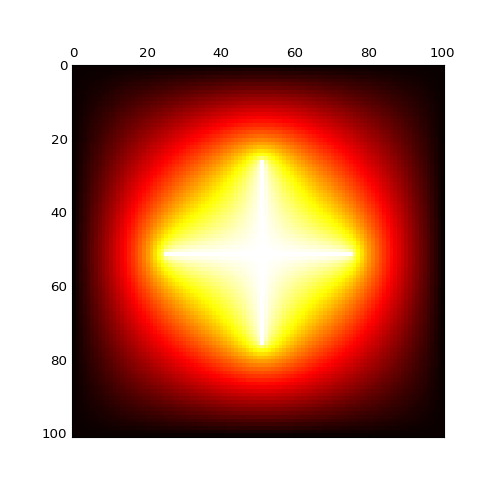

err:  0.992569262448 , cnt:  103


In [22]:
hide_me
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm

maxerr = 1000
cnt = 0;
while maxerr > 1 and cnt < 280 :
    #plt.matshow(U)
    U_old = U
    maxe = 0
    for l in range(1,N-1):
        for j in range(l%2+1,N-1,2):
            delta = SOR(U,rje,l,j)
            U[l,j] += delta
            if(abs(delta)) > maxe:
                maxe =abs(delta)
    for l in range(1,N-1):
        for j in range((l+1)%2+1,N-1,2):
            delta = SOR(U,rje,l,j)
            U[l,j] += delta
            if(abs(delta)) > maxe:
                maxe =abs(delta)

    if maxe < maxerr and maxe != 0.0:
        maxerr = maxe
    cnt+=1
plt.matshow(U/1000,cmap=cm.hot)
#plt.imshow(U, cmap=cm.hot, interpolation='nearest',vmin=0, vmax=1)
plt.show()
print("err: ",maxerr,", cnt: ",cnt)